In [1]:
#Recurrent Nural Net Approach¶
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import tensorflow as tf
%matplotlib inline

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\NaimHasan\Anacon

In [2]:
pwd

'C:\\SPB_Data\\bangladesh-weather-dataset\\bangladesh-weather-dataset'

In [5]:
#importing dataset
weather = pd.read_csv(r"C:\SPB_Data\bangladesh-weather-dataset\bangladesh-weather-dataset\datasets\weather\weather.csv")
weather.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [6]:
#checking missing data
#No missing value
weather.isnull().sum()

tem      0
Month    0
Year     0
rain     0
dtype: int64

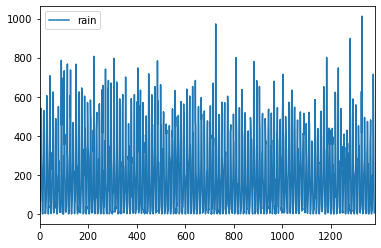

In [7]:
weather[['rain']].plot()

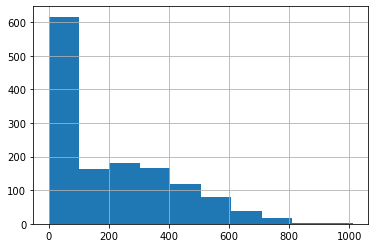

In [8]:
#histogram of the rain
weather.rain.hist()

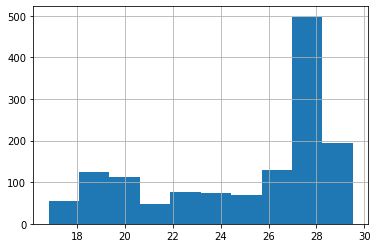

In [9]:
#histogram of the temp¶
weather.tem.hist()

No handles with labels found to put in legend.


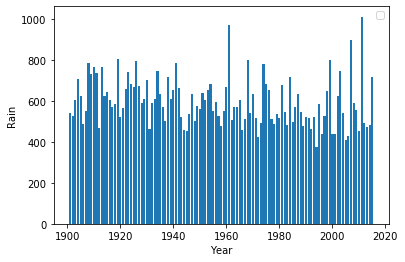

In [10]:
#Rain in different year
plt.bar(weather['Year'],weather['rain'])
plt.xlabel("Year")
plt.ylabel("Rain")
plt.legend()

No handles with labels found to put in legend.


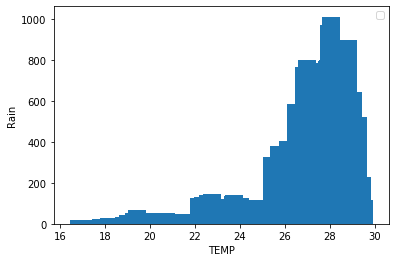

In [11]:
#Temp to Rain plot
plt.bar(weather['tem'],weather['rain'])
plt.xlabel("TEMP")
plt.ylabel("Rain")
plt.legend()

In [12]:
correlation = weather.corr()

In [13]:
#Correlation matrix
correlation

,tem,Month,Year,rain
tem,1.000000,0.159809,0.051686,0.699846
Month,0.159809,1.000000,0.000000,0.135204
Year,0.051686,0.000000,1.000000,-0.027024
rain,0.699846,0.135204,-0.027024,1.000000


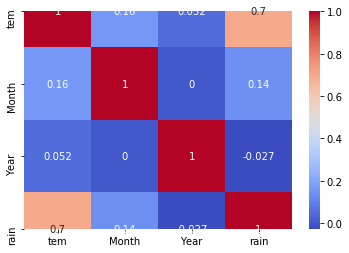

In [14]:
sns.heatmap(correlation,cmap='coolwarm',annot=True)

In [15]:
sns.set(style="whitegrid",color_codes=True)

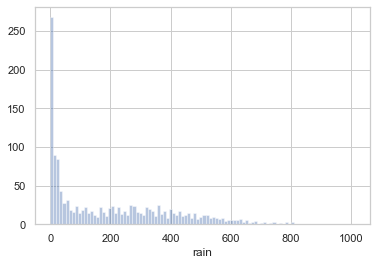

In [16]:
sns.distplot(weather['rain'], kde=False, bins=100);

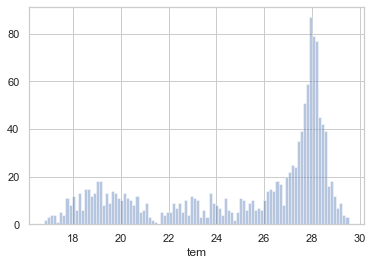

In [17]:
sns.distplot(weather['tem'],kde=False, bins=100);

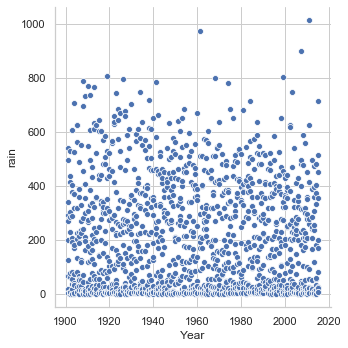

In [18]:
#relational scatter plot of differnt rain quantity in different Year
sns.relplot(x="Year", y="rain", data=weather);

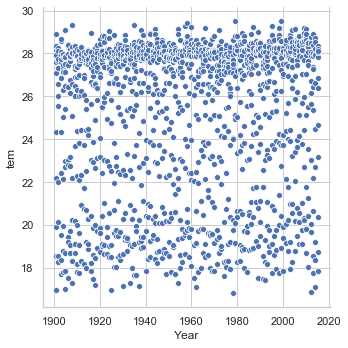

In [17]:
sns.relplot(x="Year", y="tem", data=weather);

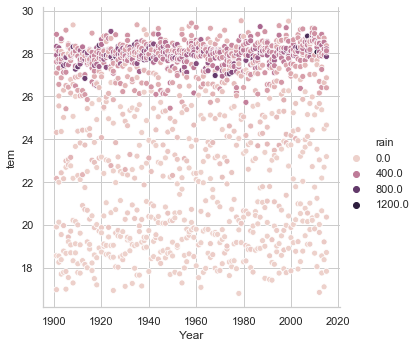

In [19]:
#relation betwen temp and rain in different year
sns.relplot(x="Year", y="tem", hue="rain", data=weather);

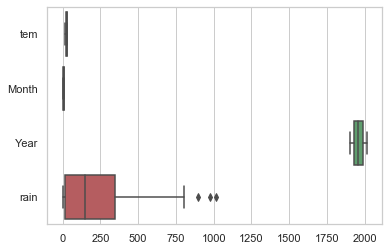

In [20]:
#box plot
sns.boxplot(data=weather,orient='h')

In [22]:
#model selection with preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [24]:
#splitting the feature matrix and target
weather.head()
X = weather.drop('rain',axis=1)
y = weather[['rain']]

In [25]:
X.head()

,tem,Month,Year
0,16.9760,1,1901
1,19.9026,2,1901
2,24.3158,3,1901
3,28.1834,4,1901
4,27.8892,5,1901


In [26]:
y.head()

,rain
0,18.5356
1,16.2548
2,70.7981
3,66.1616
4,267.2150


In [27]:
#to use RNN you have to maintain the value between a limit hence transforming it
#we transform the y so after predict we have to inverse transeform it¶
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)
result = y_test
scaler = MinMaxScaler()

scaler.fit(y_train)
y_train =scaler.transform(y_train) # we transform the y so after predict we have to inverse transeform it
scaler.fit(y_test)
y_test =scaler.transform(y_test) # we transform the y so after predict we have to inverse transeform it

In [28]:
#importing RNN module
from keras import Sequential
from keras.layers import Dense,Dropout,LSTM,Flatten


Using TensorFlow backend.


In [29]:
print (x_train.shape)
print (x_test.shape)

(1104, 3)
(276, 3)


In [30]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [31]:
x_train

array([[2.72340e+01, 4.00000e+00, 1.95500e+03],
       [2.81650e+01, 4.00000e+00, 1.95900e+03],
       [1.94921e+01, 1.00000e+00, 2.00600e+03],
       ...,
       [2.70494e+01, 1.00000e+01, 1.95500e+03],
       [2.26849e+01, 1.10000e+01, 1.93700e+03],
       [2.84513e+01, 8.00000e+00, 2.00100e+03]])

In [32]:
#this reshaping is very important before feeding to RNN
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [33]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(1104, 3, 1)
(276, 3, 1)
(1104, 1)
(276, 1)


In [34]:
#CREATE A BASIC RNN MODE

In [35]:
def RNN_model():
    regressor = Sequential()
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1)) #we want single feature output which is df['Close']
    regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
    return regressor

In [36]:
regressor = RNN_model()

Instructions for updating:
Colocations handled automatically by placer.


In [37]:
regressor.fit(x_train,y_train,epochs = 100)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1104/1104 [==============================] - 27s 24ms/step - loss: 0.0463
Epoch 2/100
1104/1104 [==============================] - 1s 636us/step - loss: 0.0326
Epoch 3/100
1104/1104 [==============================] - 0s 399us/step - loss: 0.0244
Epoch 4/100
1104/1104 [==============================] - 0s 419us/step - loss: 0.0215
Epoch 5/100
1104/1104 [==============================] - 0s 444us/step - loss: 0.0206
Epoch 6/100
1104/1104 [==============================] - 1s 615us/step - loss: 0.0182
Epoch 7/100
1104/1104 [==============================] - 0s 439us/step - loss: 0.0179
Epoch 8/100
1104/1104 [==============================] - 1s 458us/step - loss: 0.0168
Epoch 9/100
1104/1104 [==============================] - 1s 491us/step - loss: 0.0156
Epoch 10/100
1104/1104 [==============================] - 1s 53

1104/1104 [==============================] - 0s 431us/step - loss: 0.0076
Epoch 88/100
1104/1104 [==============================] - 0s 417us/step - loss: 0.0072
Epoch 89/100
1104/1104 [==============================] - 1s 469us/step - loss: 0.0072 0s - loss:
Epoch 90/100
1104/1104 [==============================] - 1s 494us/step - loss: 0.0076
Epoch 91/100
1104/1104 [==============================] - 0s 423us/step - loss: 0.0078
Epoch 92/100
1104/1104 [==============================] - 0s 400us/step - loss: 0.0073
Epoch 93/100
1104/1104 [==============================] - 0s 385us/step - loss: 0.0072
Epoch 94/100
1104/1104 [==============================] - 0s 411us/step - loss: 0.0072
Epoch 95/100
1104/1104 [==============================] - 1s 497us/step - loss: 0.0074
Epoch 96/100
1104/1104 [==============================] - 0s 439us/step - loss: 0.0075
Epoch 97/100
1104/1104 [==============================] - 0s 403us/step - loss: 0.0073
Epoch 98/100
1104/1104 [=====================

In [38]:
y_pred = regressor.predict(x_test)

In [39]:
y_pred

array([[ 1.71810538e-02],
       [ 4.96542037e-01],
       [ 6.57935143e-02],
       [ 6.63513616e-02],
       [ 1.69140086e-01],
       [ 1.77978158e-01],
       [ 3.23597908e-01],
       [ 1.67956874e-02],
       [ 4.20409530e-01],
       [ 3.44569147e-01],
       [ 1.27134100e-02],
       [ 1.43996626e-01],
       [ 5.13361394e-01],
       [-1.45424902e-03],
       [ 2.11919323e-02],
       [-4.22146171e-03],
       [ 2.02667952e-01],
       [ 2.12474093e-02],
       [ 2.94820219e-01],
       [ 3.00199091e-01],
       [ 9.57116038e-02],
       [ 1.33549646e-01],
       [ 2.07883567e-02],
       [ 1.67417228e-02],
       [ 7.35102743e-02],
       [ 6.72797933e-02],
       [ 8.42130929e-03],
       [-5.49748540e-04],
       [ 2.94965148e-01],
       [ 7.18967170e-02],
       [ 2.05159158e-01],
       [ 3.12548667e-01],
       [-1.56704336e-03],
       [ 1.74563378e-02],
       [ 5.04195690e-01],
       [ 5.11380613e-01],
       [ 2.94852138e-01],
       [ 5.24833322e-01],
       [ 1.8

In [40]:
output = scaler.inverse_transform(y_pred)

In [41]:
real_output = []
for item in output:
    real_output.append((item[0]))

In [42]:
real_output

[13.465238,
 389.12802,
 51.56156,
 51.998734,
 132.55159,
 139.47777,
 253.59619,
 13.163236,
 329.46497,
 270.0308,
 9.96406,
 112.84731,
 402.30893,
 -1.1387674,
 16.60846,
 -3.3073602,
 158.8265,
 16.651936,
 231.04385,
 235.25914,
 75.00759,
 104.660286,
 16.292187,
 13.120945,
 57.608986,
 52.72632,
 6.600452,
 -0.4299337,
 231.15744,
 56.344482,
 160.77881,
 244.93718,
 -1.2271614,
 13.68097,
 395.126,
 400.75662,
 231.06888,
 411.29916,
 147.40413,
 54.80767,
 140.35211,
 -1.7670951,
 329.78992,
 5.6434507,
 0.24443917,
 108.23374,
 231.124,
 386.26038,
 412.5072,
 231.11537,
 114.67918,
 269.58942,
 19.952023,
 326.9963,
 132.35715,
 328.61975,
 145.15755,
 411.0612,
 231.1384,
 353.8109,
 328.0361,
 -0.9517264,
 45.661034,
 -1.4685735,
 12.2992525,
 328.12482,
 118.65812,
 202.58257,
 8.276802,
 397.53317,
 151.43011,
 231.14508,
 231.1167,
 -2.346254,
 325.237,
 408.60098,
 376.89874,
 231.06158,
 11.288896,
 304.1377,
 329.37927,
 297.5605,
 9.997709,
 10.063483,
 230.95413

In [43]:
result['predited value'] = np.array(real_output)


C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
result.head()


,rain,predited value
82,9.41034,13.465238
485,783.67500,389.128021
1094,9.63505,51.561562
1046,70.32300,51.998734
909,98.27700,132.551590


In [45]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.array(result['rain']), np.array(result['predited value']))

In [46]:
import math
print ("MSE: "+str(mse))
print ("MSE: "+str(math.sqrt(mse)))

MSE: 10397.624492699817
MSE: 101.96874272393387


In [47]:
#KNN APPROACH¶
weather = pd.read_csv(r"C:\SPB_Data\bangladesh-weather-dataset\bangladesh-weather-dataset\datasets\weather\weather.csv")
X = weather.drop('rain',axis=1)
y = weather[['rain']]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knn = KNeighborsRegressor(n_neighbors=5)


In [50]:
knn.fit(x_train,y_train)
predicted=knn.predict(x_test)

In [51]:
predicted

array([[423.7144  ],
       [103.366038],
       [463.4112  ],
       [ 26.06528 ],
       [  9.213452],
       [405.4728  ],
       [ 17.349946],
       [  7.396664],
       [261.4406  ],
       [233.6952  ],
       [ 20.529498],
       [ 43.861304],
       [ 14.264388],
       [ 11.36567 ],
       [ 13.418488],
       [531.2346  ],
       [355.668   ],
       [  5.332474],
       [386.6252  ],
       [371.63804 ],
       [423.829   ],
       [254.2922  ],
       [190.3216  ],
       [  8.693364],
       [109.79904 ],
       [ 19.568078],
       [ 23.447076],
       [203.8962  ],
       [392.3976  ],
       [230.98188 ],
       [239.3352  ],
       [ 22.195642],
       [139.14654 ],
       [182.20969 ],
       [ 14.503156],
       [427.4698  ],
       [ 16.338964],
       [  3.602638],
       [521.3612  ],
       [323.4042  ],
       [409.4492  ],
       [346.1524  ],
       [  5.26876 ],
       [ 23.447076],
       [ 16.971852],
       [  0.688962],
       [366.9268  ],
       [429.7

In [52]:
real_output = []
for item in predicted:
    real_output.append((item[0]))

In [53]:
real_output

[423.71439999999996,
 103.366038,
 463.4112,
 26.06528,
 9.213452,
 405.4728,
 17.349946,
 7.396664000000001,
 261.4406,
 233.69519999999997,
 20.529498,
 43.861304,
 14.264388,
 11.365669999999998,
 13.418488000000002,
 531.2346,
 355.668,
 5.332474,
 386.62520000000006,
 371.63804000000005,
 423.82900000000006,
 254.2922,
 190.3216,
 8.693363999999999,
 109.79904000000002,
 19.568078,
 23.447076,
 203.8962,
 392.39760000000007,
 230.98188,
 239.33520000000004,
 22.195642,
 139.14654000000002,
 182.20968999999997,
 14.503156000000004,
 427.4698,
 16.338963999999997,
 3.6026380000000002,
 521.3611999999999,
 323.40420000000006,
 409.4492,
 346.1524,
 5.26876,
 23.447076,
 16.971852000000002,
 0.6889620000000001,
 366.9268,
 429.76239999999996,
 281.6662,
 267.7128,
 236.68339999999998,
 16.292350000000003,
 4.731134,
 93.720578,
 404.60864,
 18.192176,
 86.983386,
 52.56052,
 495.60279999999995,
 21.75363,
 9.758626,
 223.03172,
 251.7316,
 374.12440000000004,
 333.35839999999996,
 11.

In [54]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.array(y_test), np.array(real_output))

In [55]:
import math
print ("MSE: "+str(mse))
print ("MSE: "+str(math.sqrt(mse)))

MSE: 10315.181499031622
MSE: 101.56368198835459


In [56]:
accuracy=[]
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    accuracy.append(knn.score(x_test,y_test))


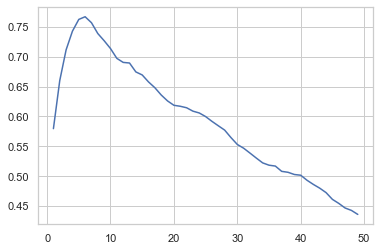

In [57]:
plt.plot(range(1,50),accuracy)

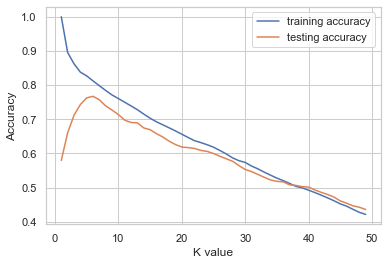

In [58]:
training_accuracy=[]
testing_accuracy=[]

neighbors = list(range(1,50))


for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))    

plt.plot(neighbors,training_accuracy,label='training accuracy')
plt.plot(neighbors,testing_accuracy,label='testing accuracy')
plt.ylabel("Accuracy")
plt.xlabel("K value")
plt.legend()

In [59]:
#CROSS VAL SCORE
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=5)

scores = cross_val_score(knn,X,y,cv=10)

print (scores)
print (scores.mean())

print ("Mean Accuracy "+str(scores.mean()))

[0.53926205 0.63794373 0.63591033 0.6132531  0.70957694 0.65164386
 0.68751551 0.68529809 0.59948161 0.57247632]
0.6332361530807367
Mean Accuracy 0.6332361530807367


[0.5890862800332627, 0.6368412357716976, 0.6251761466175294, 0.635131905707175, 0.6332361530807367, 0.6240289491085217, 0.6146147414997081, 0.5932227642880721, 0.5790634878801005, 0.5654580681628537, 0.5539408488627677, 0.5502078592164259, 0.5435095390772633, 0.5371952374012771, 0.5213913830423494, 0.5108500900341703, 0.5000941004449586, 0.48975940807935625, 0.4856129507215143, 0.4746927772419194, 0.46610143580782876, 0.45696397411776524, 0.4449989935124198, 0.436538713158126, 0.4240497048372494, 0.4139526525889913, 0.406609075788854, 0.40160785078752215, 0.39513067306474814, 0.3909585186926251, 0.3824885396086105, 0.3791323790945146, 0.37193650066123923, 0.36629309819768263, 0.36070701438600195, 0.35530915992143586, 0.3490393727230455, 0.34224798499785924, 0.33827620924195567, 0.3332144266850137, 0.327320875525738, 0.3215561550409562, 0.31595712644398144, 0.31063489186640314, 0.3055315803108783, 0.3050221750332077, 0.3051704674402034, 0.30375369421732595, 0.30326175496278523]


Text(0, 0.5, 'scores')

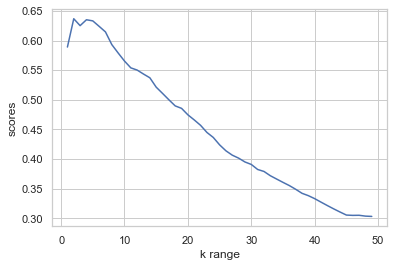

In [61]:
#now we find cross val score for different K value
k_range = range(1,50)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10)
    k_scores.append(scores.mean())
    
print (k_scores)


plt.plot(k_range,k_scores)
plt.xlabel("k range")
plt.ylabel("scores")

In [62]:
#Decision Tree Regresson
from sklearn.tree import DecisionTreeRegressor

In [63]:
tree_clf = DecisionTreeRegressor(max_depth=2,random_state=42)

In [64]:
tree_clf.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [65]:
tree_clf.score(X,y)

0.7059955999135619

In [66]:
#For different Depth
accuracy=[]
for depth in range(1,50):
    dt = DecisionTreeRegressor(max_depth=depth,random_state=42)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))

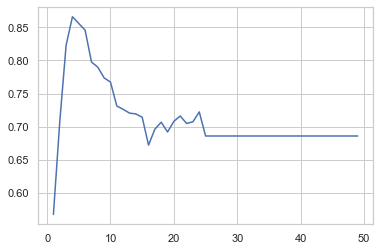

In [67]:
plt.plot(range(1,50),accuracy)

In [68]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

In [69]:
rnd = RandomForestRegressor(max_depth=10)

In [70]:
rnd.fit(x_train,y_train)


C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
rnd.score(x_test,y_test)

0.8458315328740375

In [72]:
accuracy=[]
for depth in range(1,50):
    dt = RandomForestRegressor(max_depth=depth,random_state=42)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

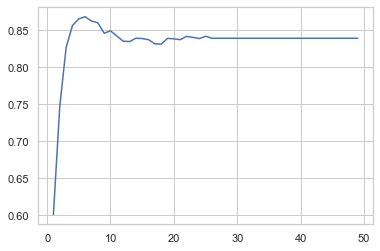

In [73]:
plt.plot(range(1,50),accuracy)

In [74]:
#Combining all the algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

from mlxtend.regressor import StackingRegressor
lsvc=LinearSVR()
dtc=DecisionTreeRegressor()
knnc=KNeighborsRegressor()
svc=SVR()
gbc=GradientBoostingRegressor()
rfc=RandomForestRegressor()

In [75]:
stregr = StackingRegressor(regressors=[lsvc,dtc,knnc,svc,gbc,rfc], 
                           meta_regressor=lsvc)

In [76]:
stregr.fit(x_train, y_train)

C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NaimHasan\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.

StackingRegressor(meta_regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                           fit_intercept=True,
                                           intercept_scaling=1.0,
                                           loss='epsilon_insensitive',
                                           max_iter=1000, random_state=None,
                                           tol=0.0001, verbose=0),
                  refit=True,
                  regressors=[LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                        fit_intercept=True,
                                        intercept_scaling=1.0,
                                        loss='epsilon_insensitive',
                                        max_iter=1000, random_state=N...
                                                    criterion='mse',
                                                    max_depth=None,
                                                    max_features='auto',
       

In [77]:
prediction = stregr.predict(x_test)

In [78]:
stregr.score(x_test,y_test)

0.7143132948717168